# Project 1: Driving Licenses, Traffic Accidents and Casualties Analysis

## Problem Statment

Craft your problem statement here using the prompt from the README and other sources you find during your investigation.

Traffic accidents are one of the major problems in the Kingdom. Many initiatives have taken place in an effort to decrease the number of traffic accidents. New regulations were implemented in October 2016 which increased traffic fines, among other regulations. It is essencial to be able to analyse the effect of these initiatives in order to guide future initiatives. With the availability of data and the latest technical tools, statistical analysis could provide information that would be valuable for decision makers. 

## Executive Summary
Write an executive summary that summarizes the problem and your key findings.

In this study, we look at two main datasets. The first is the number of traffic accidents, including number casualties injured and dead. The second is the number of Licenses issued every year. After cleaning and preparing the datasets, statistical analysis was applied to understand the distribution of each variable. The data was also plotted using different types of plots in order to compare the numbers across regions and across years. 

The analysis revealed that the number of licenses was increasing, therefore it is crucial to ensure that this increase is not coupled with an increase in the number of accidents. One of the key findings was that the number of accidents in Riyadh decreased between 2016 and 2017. This is probably due to the new traffic rules and fines that were implemented in October 2016. Therefore, the data suggests that these regulations were effective, and policy makers should continue to work in that direction. Another key finding is the increased number of accidents in the Makkah region. According to this research, the Jeddah-Makkah road is a common cause of increased accidents and casualties. Further investigation is needed to understand the traffic problem in Makkah and suggest the proper solution. 

### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here, including any Jupyter magic commands*

In [162]:
#Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
%matplotlib inline

## Datasets Description

[Driving Licenses](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-driving-licenses-issued-in-the-kingdom-2004-2008/information/?disjunctive.administritive_area&sort=time_period&location=5,24.37495,45.08024&basemap=jawg.streets)
This dataset contains Saudi Arabia Driving Licenses Issued By Administrative Area for 1993 - 2016. Data from General Authority for Statistics . Follow datasource.kapsarc.org for timely data to advance energy economics research.

[Traffic Accidents and Casualties](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008/export/?disjunctive.region&disjunctive.indicator&sort=time_period)
This dataset contains Saudi Arabia Traffic Accidents and Casualties by Region for 2016. Data from General Authority for Statistics. Follow datasource.kapsarc.org for timely data to advance energy economics research.


## Data Import and Cleaning

#### 1. Read In Driving Licenses & Traffic Accidents Data
Read in the `saudi-arabia-traffic-accidents-2008.csv` and `saudi-arabia-driving-licenses-2004-2008.csv` files and assign them to appropriately named pandas dataframes.

In [163]:
#Code
traffic = pd.read_csv('../data/saudi-arabia-traffic-accidents-2008.csv',sep=';')
license = pd.read_csv('../data/saudi-arabia-driving-licenses-2004-2008.csv',sep=';')

#### 2. Display data

Print the first 10 rows of each dataframe to your jupyter notebook

In [164]:
#Code
traffic.head()    # peeking into the data

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
0,0,0,(2016),Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334"
1,1,1,(2016),Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439"
2,2,2,(2016),Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394"
3,3,3,(2016),Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508"
4,4,4,(2016),Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508"


In [165]:
#traffic.iloc[40:50,:]   # peeking into the data

In [166]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
Unnamed: 0      84 non-null int64
Unnamed: 0.1    84 non-null int64
Year            84 non-null object
Region          84 non-null object
Indicator       84 non-null object
Value           84 non-null object
geo_point_2d    78 non-null object
dtypes: int64(2), object(5)
memory usage: 4.7+ KB


In [167]:
traffic.Region.unique()
traffic.Indicator.unique()
traffic.Region.unique().size, traffic.Indicator.unique().size
traffic.geo_point_2d.unique(),traffic.geo_point_2d.unique().size

(array(['21.628962766, 41.2636898334', '23.2883307307, 50.1478302439',
        '27.90165499, 37.2598581394', '27.400845724, 41.4406960508',
        '30.197074783, 41.8171186952', '17.2072313962, 42.6525807422',
        '29.9677445762, 39.5570371172', nan,
        '20.1484058503, 41.4665484892', '23.0814341634, 45.5857512766',
        '24.927534539, 39.4918237173', '26.1967063704, 43.3429998455',
        '18.4511003068, 46.8688495726', '19.1387847401, 42.941470036'],
       dtype=object), 14)

In [168]:
license.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
Unnamed: 0             350 non-null int64
Year                   350 non-null object
Administritive Area    350 non-null object
Driving Liceses        350 non-null object
geo_point_2d           325 non-null object
dtypes: int64(1), object(4)
memory usage: 13.8+ KB


In [169]:
## investigating the data ....

traffic.Region.unique()
license['Administritive Area'].unique()
traffic.Year.unique(), traffic.Year.unique().size
license.Year.unique(), license.Year.unique().size
license.geo_point_2d.unique(),license.geo_point_2d.unique().size

(array(['21.628962766, 41.2636898334', '24.927534539, 39.4918237173',
        '26.1967063704, 43.3429998455', '23.2883307307, 50.1478302439',
        '19.1387847401, 42.941470036', '27.90165499, 37.2598581394',
        '27.400845724, 41.4406960508', '30.197074783, 41.8171186952',
        '17.2072313962, 42.6525807422', '18.4511003068, 46.8688495726',
        '20.1484058503, 41.4665484892', '29.9677445762, 39.5570371172',
        nan, '23.0814341634, 45.5857512766'], dtype=object), 14)

#### 3. Briefly describe the data

Take your time looking through the data and briefly describe the data in the markdown cell below. Note things about what the columns might mean, and the general information that is conveyed in the dataframe.

Answer:
The Traffic data contains 84 observations of different traffic data per region in Saudi Arabia. There are initially 7 columns/variables per observation: region, year, indicator, geopoint, value (although not initially clear what is meant by value), and two more columns which only contain numbers that correspont to the index value. 
The License data contains 350 entries of Driving Licenses, with 5 columns/variables. The variables availabe for each observation are the year, Administrative Area (corresponds to Region in the Traffic Dataset), License numbers, and geopoints. There is one more column which contains numbers that correspond to the index value. 

#### 4a. How complete is the data?

Investigate missing values etc.

In [170]:
#Code
traffic.isna().sum()  
# there are 6 missing entries only 

Unnamed: 0      0
Unnamed: 0.1    0
Year            0
Region          0
Indicator       0
Value           0
geo_point_2d    6
dtype: int64

In [171]:
# all in the geo_point_2d column 
# all corresponding to the Region "Total", which makes sense .. 
traffic[traffic['Region']=='Total']

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
8,8,8,(2017),Total,No. of Casualties - Dead,7489n,NaN
29,29,29,(2016),Total,No. of Accidents,533380n,NaN
30,30,30,(2016),Total,No. of Casualties - Injured,38120n,NaN
68,68,68,(2017),Total,No. of Accidents,460488n,NaN
69,69,69,(2017),Total,No. of Casualties - Injured,33199n,NaN
77,77,77,(2016),Total,No. of Casualties - Dead,9031n,NaN


In [172]:
license.isna().sum() 
# there are 25 missing entries only

Unnamed: 0              0
Year                    0
Administritive Area     0
Driving Liceses         0
geo_point_2d           25
dtype: int64

In [173]:
# all in the geo_point_2d column
# all corresponding to the Region "Total", which makes sense ..
license[license['Administritive Area']=='Total']

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
58,58,(2015),Total,435439n,NaN
59,59,(2017),Total,928165n,NaN
60,60,(1993),Total,294893n,NaN
61,61,(1994),Total,303520n,NaN
62,62,(2003),Total,254858n,NaN
63,63,(2006),Total,267508n,NaN
142,142,(2014),Total,625414n,NaN
143,143,(2010),Total,386510n,NaN
144,144,(2012),Total,411204n,NaN
145,145,(1999),Total,332210n,NaN


In [174]:
# it seems that the x and y coordinates correspond to the regions in both dataframes..
# this can be observed by finding the number of unique values and randomly skimming through the dataset
len(traffic['Region'].unique()), len(traffic['geo_point_2d'].unique())

(14, 14)

In [175]:
len(license['Administritive Area'].unique()), len(license['geo_point_2d'].unique())

(14, 14)

In [176]:
traffic['Region'].unique()

array(['Makkah', 'Eastern Region', 'Tabouk', 'Hail', 'Northern Boarder',
       'Jazan', 'Al-Jouf', 'Total', 'Al-Baaha', 'Riyadh', 'Madinah',
       'Qassim', 'Najran', 'Asir'], dtype=object)

In [177]:
license['Administritive Area'].unique()

array(['Makkah', 'Madinah', 'Al-Qaseem', 'Eastern', 'Assir', 'Tabouk',
       'Hail', 'Northern Boarder', 'Jazan', 'Najran', 'Al-Baha',
       'Al-Jouf', 'Total', 'Riyadh'], dtype=object)

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each dataset? What is the maximum *possible* value?**

The results of the summary statistics here are not helpful becasue the column is still an Object, its not numeric yet.

In [178]:
#Code
traffic.Value.min() , traffic.Value.max()

('1007n', '99925n')

In [179]:
#traffic.describe()    # display summary statisctics 

In [180]:
#license.describe()    # display summary statisctics 

#### 5. What are your data types? 
Display the data types of each feature. 

In [181]:
#code
traffic.dtypes

Unnamed: 0       int64
Unnamed: 0.1     int64
Year            object
Region          object
Indicator       object
Value           object
geo_point_2d    object
dtype: object

In [182]:
license.dtypes

Unnamed: 0              int64
Year                   object
Administritive Area    object
Driving Liceses        object
geo_point_2d           object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:

--reseting data types-
All data types are of type "Object". 
We need to transform "Year" into an integer.

--renaming columns--
Region and Administritive Area actually represent the same data, but they have different names in each dataframe and the regions are also spelled differently among the two dataframes.

--Cleaning some Data--
The columns "Traffic.Driving Liceses" and "License.Value"  contain letter "n". 
Traffic.Year is wraped in brackets. 
Both cases do not make sense and should be cleaned.

--splitting columns--
The geo_point_2d column would be more efficient if we split it into two columns.

--Unstacking Columns--
The column Indicator actually indicates three types of traffic accidents:
    No. of Casualties - Injured 
    No. of Casualties - Dead
    No. of Accidents
and the column value contains the corresponding value.
"Indicator" would make much more sense if it was unstacked to three columns.

--Removing unnecessary columns--
the columns "Unnamed: 0" and "Unnamed: 0.1"  in the Traffic Dataframe are meaningless in their names and values. They only contain integers that correspond to the index. The same goes for the column "Unnamed: 0" in the License dataframe. 

--Removing unnecessary rows--
Entries that correspond to totals should be removed from the dataframe because they are not really observations of what we are investigating (i.e. num of licenses issued and num of traffic accidents), rather they represent a summary for other entries. 

#### 6. Fix incorrect data types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert numerical columns to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [183]:
#code
traffic.Year = traffic.Year.map(lambda x: x.replace('(',''))
traffic.Year = traffic.Year.map(lambda x: x.replace(')',''))

license.Year = license.Year.map(lambda x: x.replace('(',''))
license.Year = license.Year.map(lambda x: x.replace(')',''))

In [184]:
traffic.Year = pd.to_numeric(traffic.Year)
license.Year = pd.to_numeric(license.Year)

- Make new columns `x` and `y` using `geo_point_2d`

In [185]:
#code
traffic[['x','y']] = traffic.geo_point_2d.str.split(',',expand= True)        
license[['x','y']] = license.geo_point_2d.str.split(',',expand= True) 

In [186]:
traffic['x'] = pd.to_numeric(traffic['x'])
traffic['y'] = pd.to_numeric(traffic['y'])
license['x'] = pd.to_numeric(license['x'])
license['y'] = pd.to_numeric(license['y'])

- Fix any individual values preventing other columns from being the appropriate type.

In [187]:
#code
license['Driving Liceses'] = license['Driving Liceses'].map(lambda lcns : lcns.replace('n',''))
license['Driving Liceses'] = pd.to_numeric(license['Driving Liceses'])

traffic['Value'] = traffic['Value'].map(lambda lcns : lcns.replace('n',''))
traffic['Value'] = pd.to_numeric(traffic['Value'])

- Finish your data modifications by making sure the columns are now typed appropriately.

In [188]:
#code
# in this step, we are removing the columns Unnamed: 0 and Unnamed: 0.1 from Traffic, 
# and Unnamed: 0 from License
license = license[['Year', 'Administritive Area', 'Driving Liceses','x', 'y']]
traffic = traffic[['Year', 'Region', 'Indicator','Value','x','y']]

- Display the data types again to confirm they are correct.

In [189]:
#Code:
traffic.dtypes

Year           int64
Region        object
Indicator     object
Value          int64
x            float64
y            float64
dtype: object

In [190]:
license.dtypes

Year                     int64
Administritive Area     object
Driving Liceses          int64
x                      float64
y                      float64
dtype: object

#### 7. Rename columns
Change the names of the columns to more expressive names so that you can tell the difference the Driving Licenses  columns and the & Traffic Accidents columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these two datasets, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).
- Please also fix any typos you see in the column names.

In [191]:
# a solution that maps all column names being changed at once
traffic.columns = traffic.columns.map(lambda x: x.lower())
license.columns = license.columns.map(lambda x: x.lower())
license.columns = license.columns.map(lambda x: x.replace(' ','_'))

In [192]:
# Individual renaming of certain columns ..
# choosing descriptive names and fixing typos

traffic.rename(columns={'value':'num_of_traffic_accidents','indicator':'traffic_accident_indicator','x':'x_coordinate','y':'y_coordinate'}, inplace=True)
license.rename(columns={'administritive_area': 'region','driving_liceses':'num_of_licenses','x':'x_coordinate','y':'y_coordinate'}, inplace=True)

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|year|integer|Traffic Accidents|Year at which number of issued driving licences| 
|region|object|Traffic Accidents|Driving licences origin of issuance| 
|number_of_traffic_accidents|integer|Traffic Accidents|the number of traffic accidents per year and region| 
|num_of_casualties_dead|integer|Traffic Accidents|the number of casualties dead by car accidents per year and region| 
|num_of_casualties_injured|integer|Traffic Accidents|the number of casualties injured by car accidents per year and region| 


|Feature|Type|Dataset|Description|
|---|---|---|---|
|year|integer|Driving Licences|Year at which number of issued driving licences| 
|region|object|Driving Licences|Driving licences origin of issuance| 
|num_of_licenses|int|Driving Licences|Number of issued driving licences per year and region| 






#### 9. Drop unnecessary rows

This study concerns accident and license in regions/area. Please do the followings:
0. Which rows are not associated with regions? 
            ANSWER: rows that correspond to a Total rather than a region
1. Confirm the numbers of all regions add up to total.  
        
2. Remove the rows that are not associated with regions

In [193]:
# 1. Confirm the numbers of all regions add up to total.  
traffic[(traffic['region']!='Total')&(traffic['year']==2016)]['num_of_traffic_accidents'].sum()

580531

In [194]:
traffic[(traffic['region']=='Total')&(traffic['year']==2016)]['num_of_traffic_accidents'].sum()

580531

In [195]:
traffic[(traffic['region']!='Total')&(traffic['year']==2017)]['num_of_traffic_accidents'].sum()

501176

In [196]:
traffic[(traffic['region']!='Total')&(traffic['year']==2017)]['num_of_traffic_accidents'].sum()

501176

In [197]:
traffic.drop(traffic[traffic['region'] == 'Total' ].index , inplace=True)

In [198]:
license.drop(license[license['region'] == 'Total' ].index , inplace=True)

------------------------------------------------------------------------------------------------------
The coordinates columns seem useless
They just correspond directly to the name of the region
They are not used for calculating distances or any other values
Therefore these columns will be dropped

In [199]:
traffic.drop(['x_coordinate','y_coordinate'],axis=1,inplace=True)
license.drop(['x_coordinate','y_coordinate'],axis=1,inplace=True)

In [200]:
# unify the names of the regions among the two dataframe
# it is cleaner this way, and also it will be essencial for merging the two dataframes later
license.replace(['Al-Qaseem', 'Eastern', 'Assir'],['Alqaseem','Eastern Region','Asir'])
traffic.replace(['Al-Baaha','Qassim'],['Al-Baha','Alqaseem']);

#### 10a. Data formats
Is the License data in long or wide format? How about the Accident data? And why?

#### 10b. Changing formats
Which format would work best for both dataframes? Transform the datasets to the same format before merging in the next task.

In [201]:
traffic.set_index(['region','year','traffic_accident_indicator'],inplace=True)

In [202]:
# reshaping traffic from long to wide
traffic = traffic.unstack('traffic_accident_indicator')

In [203]:
# rename columns to avoid composite column names
traffic.columns = ['num_of_accidents','num_of_casualties_dead','num_of_casualties_injured']

In [204]:
license.set_index(['region','year'],inplace=True)

#### 11. Merge dataframes

Join the Driving Licenses & Traffic Accidents dataframes using the **region** and **year** in each dataframe as the key. Assign this to a new variable. Which join should you use to preserve the most data?

ANSWER:
After looking at all four types of joins, I decided to take the inner join in order to avoid NaNs.

In [205]:
#code
inner = pd.merge(traffic,license,how='inner',on=['region','year']).shape
left = pd.merge(traffic,license,how='left',on=['region','year']).shape
right = pd.merge(traffic,license,how='right',on=['region','year']).shape
outer = pd.merge(traffic,license,how='outer',on=['region','year']).shape
inner, left, right, outer

((18, 4), (26, 4), (325, 4), (333, 4))

In [206]:
# I decided to take the inner join to avoid NaNs
df = pd.merge(traffic,license,how='inner',on=['region','year'])

#### 12. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_datasets.csv`.

In [207]:
#code
df.to_csv('../data/combined_datasets.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [63]:
#Code:
df_stats = df.describe().transpose()
df_stats

,count,mean,std,min,25%,50%,75%,max
num_of_accidents,18.0,38877.000000,51442.889217,3193.0,10276.25,13835.5,24945.00,145541.0
num_of_casualties_dead,18.0,644.333333,615.990737,112.0,241.25,391.0,761.50,2243.0
num_of_casualties_injured,18.0,2902.833333,3412.830880,374.0,795.25,1483.5,3867.25,12383.0
num_of_licenses,18.0,69517.555556,124299.850286,2153.0,9586.25,16085.0,49921.50,495307.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [64]:
#code
def std(arr):
    # arr is a numpy array
    return (sum((arr-np.mean(arr))**2)/len(arr))**(1/2)
    

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'Driving_Licenses_x': 120, 'Traffic_Accidents_x': 120, ...}`

In [65]:
#Code:
{column:[std(df[column].values)]  for column in df.columns}

{'num_of_accidents': [49993.50205887872],
 'num_of_casualties_dead': [598.6353926500949],
 'num_of_casualties_injured': [3316.675448062077],
 'num_of_licenses': [120797.74125933823]}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [66]:
# Pandas' describe() method
df_stats['std']

num_of_accidents              51442.889217
num_of_casualties_dead          615.990737
num_of_casualties_injured      3412.830880
num_of_licenses              124299.850286
Name: std, dtype: float64

In [67]:
# numpy std method
{column: np.std(df[column]) for column in df.columns}

{'num_of_accidents': 49993.50205887872,
 'num_of_casualties_dead': 598.6353926500949,
 'num_of_casualties_injured': 3316.675448062077,
 'num_of_licenses': 120797.74125933823}

Answer:
My answer is identical to numpy's sdt method, but different from pandas' describe() method, although still close. This is because pandas' standard deviation method uses the unbiased estimator (n-1 in the denominato), whereas Numpy uses the unbiased standard deviation because it assumes it is working with the population, not the sample.

____________________________________________________________________________________________________________________________

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017) 

ANSWER: 
Highest ->Riyadh - Makkah - Eastern Region
Lowest -> Northern Border - Albaha - Najran - Tabuk

- Which regions have the highest and lowest Traffic Accidents numbers for years (2016 - 2017)

ANSWER: 
Highest ->Riyadh - Makkah
Lowest -> Najran - Albaha

- What are the regions that have more Driving Licenses issued in each year than the year average? 

ANSWER: Riyadh - Makkah - Eastern Region
        The Year Average: 69517.555556
- What are the regions that have more Traffic Accidents happened in each year than the year average?

ANSWER: Riyadh - Makkah - Eastern Region
        The Year Average: 38877.000000

Based on what you've just observed, have you identified any regions that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [68]:
# regions that have the highest Driving Licenses based on years (1993 - 2017)
#create a for loop that iterates over the years
for year,info in license.groupby('year'):
    
        # in each iteration, get the row (region) with the max licenses 
        maxi = info.num_of_licenses.max()
        i = info.num_of_licenses ==  maxi
        print(info.loc[i,:])

             num_of_licenses
region year                 
Riyadh 1993           103886
             num_of_licenses
region year                 
Riyadh 1994           110545
             num_of_licenses
region year                 
Riyadh 1995           101608
             num_of_licenses
region year                 
Riyadh 1996           110131
             num_of_licenses
region year                 
Riyadh 1997            92145
             num_of_licenses
region year                 
Riyadh 1998           114962
             num_of_licenses
region year                 
Makkah 1999           103535
             num_of_licenses
region year                 
Makkah 2000            87053
             num_of_licenses
region year                 
Makkah 2001            85593
             num_of_licenses
region year                 
Makkah 2002            88593
              num_of_licenses
region  year                 
Eastern 2003            82697
             num_of_licenses
region year

In [69]:
# regions that have the lowest Driving Licenses based on years (1993 - 2017)   
#create a for loop that iterates over the years
for year,info in license.groupby('year'):
    
        # in each iteration, get the row (region) with the min licenses   
        i = info.num_of_licenses == info.num_of_licenses.min()    
        print(info[i])

                       num_of_licenses
region           year                 
Northern Boarder 1993             1510
                       num_of_licenses
region           year                 
Northern Boarder 1994             1457
                       num_of_licenses
region           year                 
Northern Boarder 1995             1318
                       num_of_licenses
region           year                 
Northern Boarder 1996             1383
                       num_of_licenses
region           year                 
Northern Boarder 1997             1531
                       num_of_licenses
region           year                 
Northern Boarder 1998             2014
                       num_of_licenses
region           year                 
Northern Boarder 1999             2311
                       num_of_licenses
region           year                 
Northern Boarder 2000             2894
                       num_of_licenses
region           year    

In [70]:
# regions that have the highest Traffic Accidents numbers for years (2016 - 2017)
traffic.groupby('year').num_of_accidents.max()
for year,info in traffic.groupby('year'):
    i = info.num_of_accidents == info.num_of_accidents.max()   
    print(info[i])

             num_of_accidents  num_of_casualties_dead  \
region year                                             
Riyadh 2016            141736                    1430   

             num_of_casualties_injured  
region year                             
Riyadh 2016                       4207  
             num_of_accidents  num_of_casualties_dead  \
region year                                             
Makkah 2017            145541                    1641   

             num_of_casualties_injured  
region year                             
Makkah 2017                      10623  


In [71]:
# regions that have the lowest Traffic Accidents numbers for years (2016 - 2017)
for year,info in traffic.groupby('year'):
    i = info.num_of_accidents == info.num_of_accidents.min()   
    print(info[i])

             num_of_accidents  num_of_casualties_dead  \
region year                                             
Najran 2016              3235                     173   

             num_of_casualties_injured  
region year                             
Najran 2016                        706  
               num_of_accidents  num_of_casualties_dead  \
region   year                                             
Al-Baaha 2017              1414                     134   

               num_of_casualties_injured  
region   year                             
Al-Baaha 2017                       1007  


In [72]:
# What are the regions that have more Driving Licenses issued in each year than the year average(region average per year)? 
year_avg = 69517.555556
license[license['num_of_licenses'] > year_avg]

num_of_licenses
region    year                 
Makkah    2012           143954
          1994            75349
          1998            86082
          2004            86636
          2008            77013
Eastern   2015           135752
Riyadh    2013           165994
          1999           100291
Makkah    2015           157389
          2013           131108
Riyadh    1997            92145
Makkah    2014           149234
          2010           113531
          1997            76623
          1999           103535
          2000            87053
          2009           112045
Eastern   2017           126816
          2011           151087
          2012           129971
Riyadh    1993           103886
          1995           101608
          1994           110545
          2014           194208
          1996           110131
Makkah    2017           142487
          2016           136055
          2001            85593
Eastern   2013           123325
          2002            85035
          2001            74119
          2006            79517
          2007           106511
          2008           104626
Makkah    2011           110647
Eastern   2014           121774
          2016           142307
          2010           110295
          2003            82697
          2009           108544
Riyadh    2017           495307
          2016           242851
          1998           114962
Makkah    2002            88593
          2003            74236
          2007            91902
Al-Qaseem 1993            73618
Eastern   1998            70650
          2004            84984
          2005            82505

In [73]:
# What are the regions that have more Traffic Accidents happened in each year than the year average?
year_avg = 38225.692308
traffic[traffic['num_of_accidents'] > year_avg]

num_of_accidents  num_of_casualties_dead  \
region         year                                             
Eastern Region 2016            101619                    1113   
               2017             81433                     963   
Makkah         2016            134838                    2243   
               2017            145541                    1641   
Riyadh         2016            141736                    1430   
               2017             99925                    1399   

                     num_of_casualties_injured  
region         year                             
Eastern Region 2016                       4893  
               2017                       4073  
Makkah         2016                      12383  
               2017                      10623  
Riyadh         2016                       4207  
               2017                       4540

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

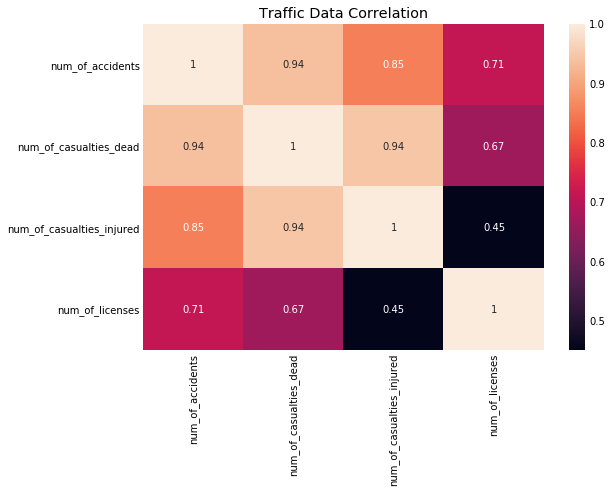

In [74]:
plt.figure(figsize=(8,6))
ax = sns.heatmap(df.corr(),annot=True,)
ax.set_title('Traffic Data Correlation');

# Interpreting the Heatmap
 The heatmap illustrates that the three types of accidents are highlycorrelated 
 This is expected because the three variables represent essencially the same thing (accidents) but different types (deadly vs non-deadly ..)

 Number of accidents is also correlated with the number of licenses (0.71)

#### Define a custom function to subplot histograms

We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [75]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(12, 10)) # You'll want to specify your figsize
    plt.subplots_adjust(wspace=0.2,hspace=0.4)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])# Set titles, labels, etc here for each subplot
        

#### Plot and interpret histograms 
For each of the following:
- Driving Licenses number
- Traffic Accidents number

Please plot two additional histograms that will help with your understanding of the data

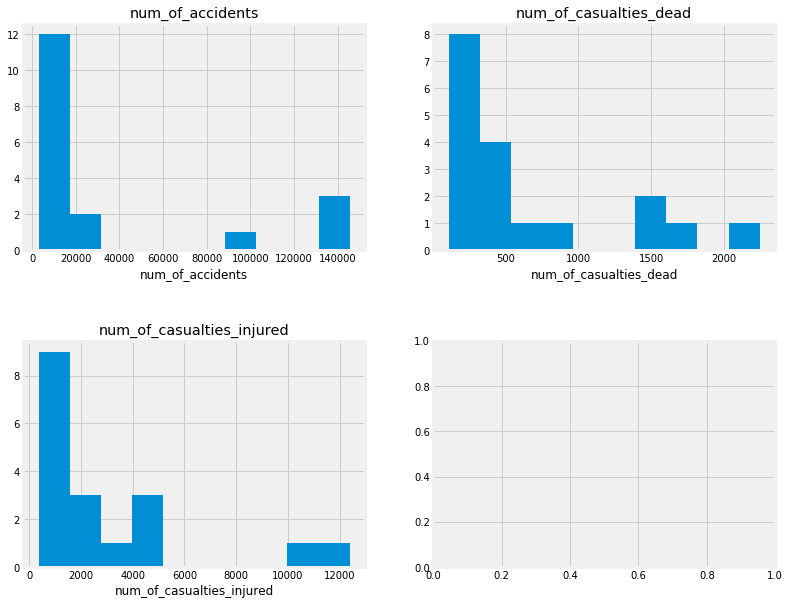

In [76]:
df_cols = df[['num_of_accidents', 'num_of_casualties_dead','num_of_casualties_injured']].columns
subplot_histograms(df,df_cols.values,df_cols.tolist(),df_cols.tolist())

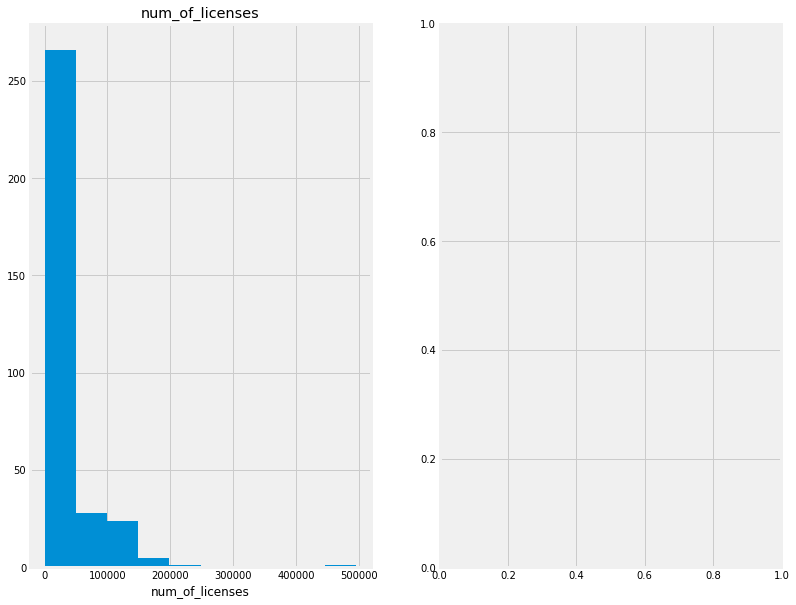

In [77]:
subplot_histograms(license,license.columns.values,license.columns.tolist(),license.columns.tolist())

## Interpretation of Accidents' Histograms

The histograms illustrate the frequency of the variable's values in each case. All four variables have distributions skewed to the right. most regions have low numbers/values accross all four variables, then outliers to the right of the plot which usually represent the larger more crowded cities Riyadh and Makkah.

### Number of Accidents:
Most regions have low numbers of accidents per year (lower than 4000), with a median* of 13835.5
Then there are two outliers Riyadh and Makkah with accident levels above 10,000. 

### Number of Injuries
Most regions have low numbers of casualties injured by car accidents per year (lower than 5000), with a median* number of 1483.5 
Then there is one outlier, Makkah, with a mean rate above 10,000. 

### Number of Deaths
Most regions have low numbers of casualty deaths by car accidents per year (lower than 1000), with a median* number of 391.0 
Then there are two outliers Riyadh and Makkah with mean casualty deaths above 1000 per year. 

### Number of Licenses
Most regions have low numbers of licenses issued every year , with a median* number of 16085.0 
There is one outlier, Riyadh with a mean of more than 350,000 licenses per year. 

*looking at the median because there are outliers pulling the mean to the right.

In [78]:
# Calculating Medians
med_accidents = df['num_of_accidents'].median()
med_injured = df['num_of_casualties_injured'].median()
med_deaths = df['num_of_casualties_dead'].median()
med_licenses = df['num_of_licenses'].median()
med_accidents, med_injured, med_deaths, med_licenses

(13835.5, 1483.5, 391.0, 16085.0)

#### Plot and interpret scatter plots

For each of the following:
- Driving Licenses vs. Traffic Accidents for 2017
- Driving Licenses vs. Traffic Accidents for 2016
- Driving Licenses for 2016 vs 2017
- Traffic Accidents for 2016 vs 2017

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


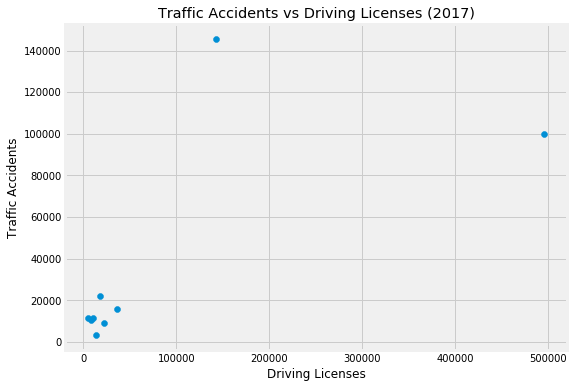

In [79]:
# Scatter Plot - Driving Licenses vs. Traffic Accidents for 2017
traffic_accidents_2017 = df.loc[(slice(None),2017),'num_of_accidents']
driving_licenses_2017 = df.loc[(slice(None),2017),'num_of_licenses']

plt.figure(figsize=(8,6))
plt.scatter(driving_licenses_2017,traffic_accidents_2017)
plt.xlabel('Driving Licenses')
plt.ylabel('Traffic Accidents')
plt.title("Traffic Accidents vs Driving Licenses (2017)")
plt.show();

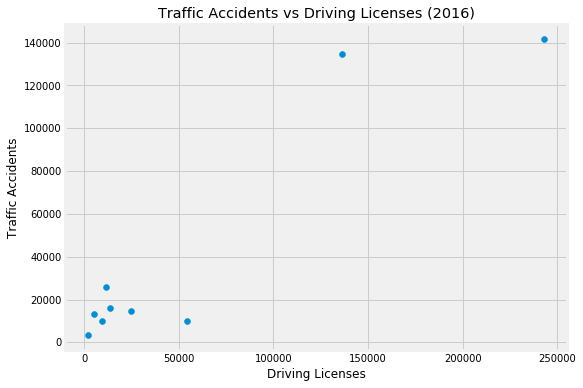

In [80]:
# Scatter Plot - Driving Licenses vs. Traffic Accidents for 2016
traffic_accidents_2016 = df.loc[(slice(None),2016),'num_of_accidents']
driving_licenses_2016 = df.loc[(slice(None),2016),'num_of_licenses']

plt.figure(figsize=(8,6))
plt.scatter(driving_licenses_2016,traffic_accidents_2016)
plt.xlabel('Driving Licenses')
plt.ylabel('Traffic Accidents')
plt.title("Traffic Accidents vs Driving Licenses (2016)")
plt.show();

## Interpretation
The two scatter plots above suggest that the number of traffic accidents and driving licenses increase together. However, this would be missleading. An increase in the number of driving licenses suggests a bigger and perhaps more crowded city/region, which could explain higher traffic accidents in most cases. In this case, city size/population would be a confounding variable (a third variable that leads to a causal relationship between the first two variables). Further investigation is needed to prove that this is the case.

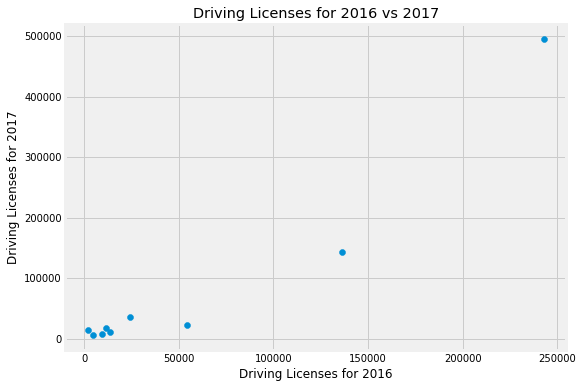

In [81]:
#Driving Licenses for 2016 vs 2017
driving_licenses_2016 = df.loc[(slice(None),2016),'num_of_licenses'].sort_index()
driving_licenses_2017 = df.loc[(slice(None),2017),'num_of_licenses'].sort_index()

plt.figure(figsize=(8,6))
plt.scatter(driving_licenses_2016,driving_licenses_2017)
plt.xlabel('Driving Licenses for 2016')
plt.ylabel('Driving Licenses for 2017')
plt.title("Driving Licenses for 2016 vs 2017")
plt.show();

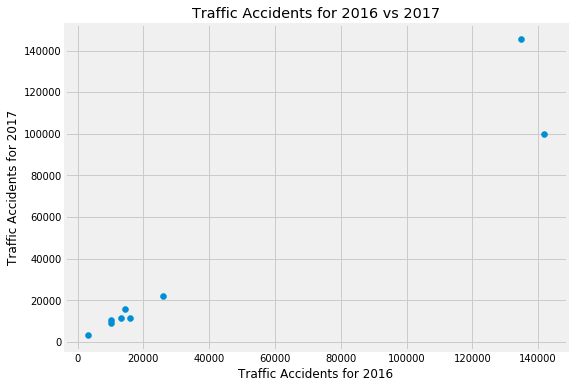

In [82]:
#Traffic Accidents for 2016 vs 2017
traffic_accidents_2016 = df.loc[(slice(None),2016),'num_of_accidents'].sort_index()
traffic_accidents_2017 = df.loc[(slice(None),2017),'num_of_accidents'].sort_index()

plt.figure(figsize=(8,6))
plt.scatter(traffic_accidents_2016,traffic_accidents_2017)
plt.xlabel('Traffic Accidents for 2016')
plt.ylabel('Traffic Accidents for 2017')
plt.title("Traffic Accidents for 2016 vs 2017")
plt.show();

## Interpretation - 

### Driving Licenses & Traffic Accidents for 2016 vs 2017 

In my opinion, these two scatter plots are not interesting; they do not provide any further insight to our data.
Scatter plots are used to understand the relationship between two variables. In this case we are using the scatter plot for the same variable, just looking at two consecutive years. I believe that it would make more sense to compare the variable's values over two years, in which case we would use a bar plot for comparison.

The result looks like  a positive correlation, which is expected because its the same variable over two consecutive years.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

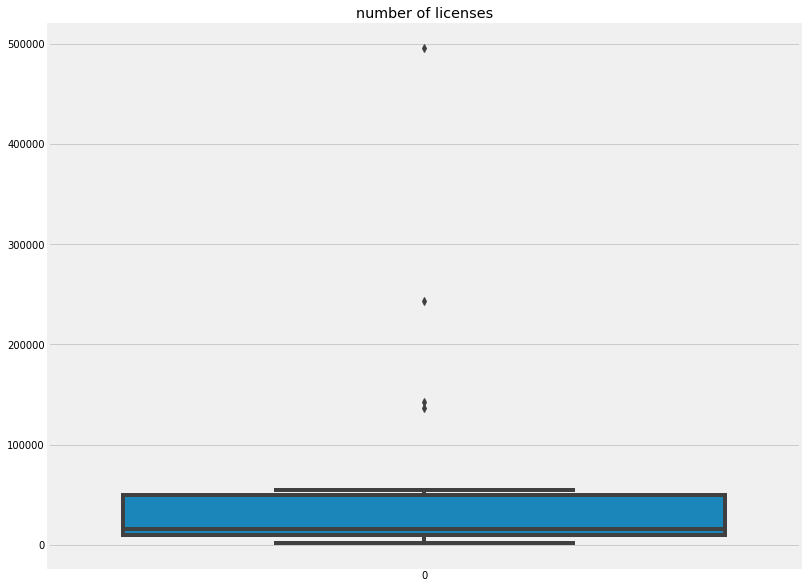

In [83]:
plt.figure(figsize=(12, 10))
ax = sns.boxplot(data=df.num_of_licenses)
ax.set_title('number of licenses');

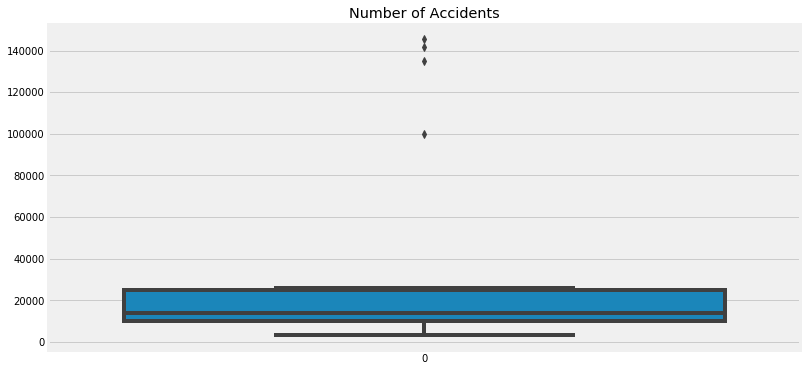

In [84]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=df.num_of_accidents)
ax.set_title("Number of Accidents");

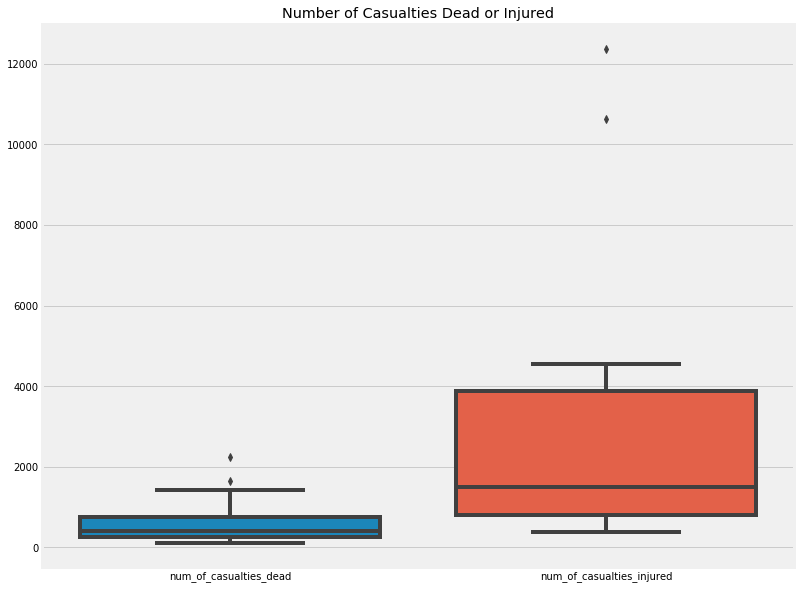

In [85]:
plt.figure(figsize=(12,10))
ax = sns.boxplot(data=df[['num_of_casualties_dead','num_of_casualties_injured']])
ax.set_title("Number of Casualties Dead or Injured");

## Interpretation of Box Plots:   

The plots illustrate the summary statisitics for each variable. It is similar to the histogram plotted earlier, but reveals more details about the range of the distribution. 

All the variables have a positively skewed distribution. This skewness is due to outliers; the large crowded cities Riyadh and Makkah. We can see that the line within the box, representing the median, is towards the bottom of the box because the data is skewed to the right. The second quartile is narrower than the third quartile across all variables.


#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

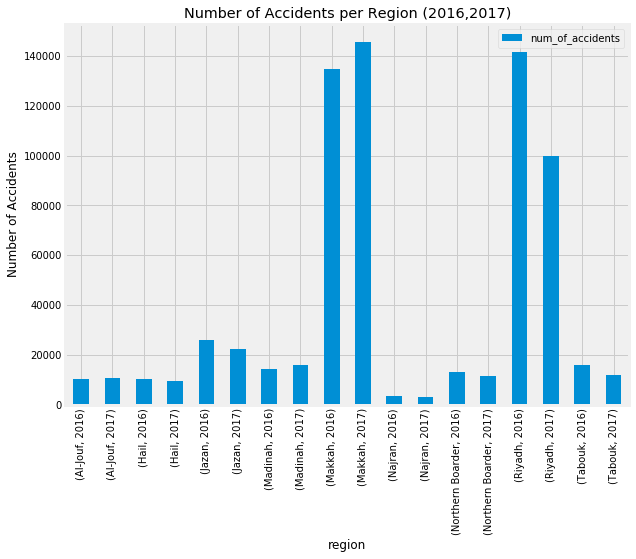

In [86]:
df[['num_of_accidents']].sort_index().plot.bar(figsize=(9,7))
plt.title('Number of Accidents per Region (2016,2017)')
plt.xlabel('region')
plt.ylabel('Number of Accidents')
plt.show();

In this Bar plot, we are investigating the number of accidents accross regions. Makkah has the highest number of accidents. When compared to the Riyadh region, the number of accidents is disproportionate to the number of licenses. Further investigation revealed that the Jeddah-Makkah road is a common source of accidents. This is discussed in more detail in the final part of this report along with a reference to support the given information.

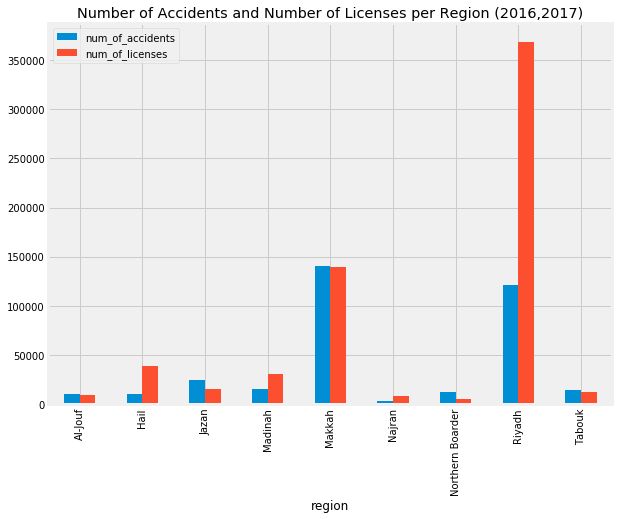

In [87]:
df.groupby('region')['num_of_accidents','num_of_licenses'].mean().plot(kind='bar',figsize=(9,7))
plt.title('Number of Accidents and Number of Licenses per Region (2016,2017)')
plt.xlabel('region')
plt.show();

The bar plot above reveals the proportion of the number of accidents to the number of licenses. We can see that Makkah has the highest proportion of accidents compared to the number of licenses in the region.

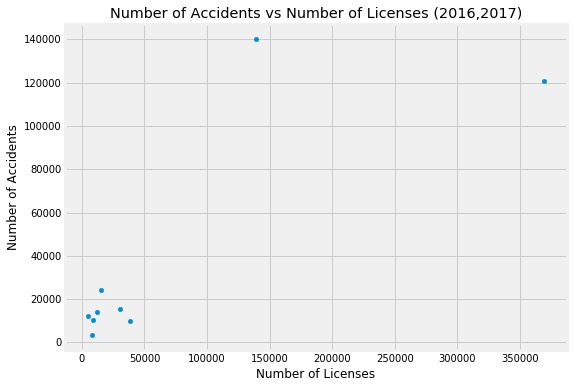

In [88]:
df.groupby('region').mean().plot(kind='scatter',x='num_of_licenses',y='num_of_accidents',figsize=(8,6))
plt.title('Number of Accidents vs Number of Licenses (2016,2017)')
plt.xlabel('Number of Licenses')
plt.ylabel('Number of Accidents')
plt.show();

The scatter plot above illustrates that Makkah has the highest proportion of accidents compared to the number of licenses in the region.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

# Summary Statistics

Most regions have low values accross all four variables and consistently across all years. Riyadh and Makkah on the other hand, consistently have higher values for all four variables across the given years. These two cities have a larger size and a higher population than the other cities in the sample. The result of this distribution of values is a right-skewed distribution, with one or two outliers to the right. In this case, the mean has a larger value than the median because it is effected by the presence of outliers.

### Summary Statistics for each Variable

### 1- Number of Accidents:
Most regions have low numbers of accidents per year (lower than 4000), with a median* of 13835.5 Then there are two outliers Riyadh and Makkah with accident levels above 10,000. 
The range of the values is 142348, and the standard deviation is 51442.9.

### 2- Number of Injuries
Most regions have low numbers of casualties injured by car accidents per year (lower than 5000), with a median* number of 1483.5 Then there is one outlier, Makkah, with a mean rate above 10,000.
The range of the values is 12009, and the standard deviation is 3412.8.

### 3- Number of Deaths
Most regions have low numbers of casualty deaths by car accidents per year (lower than 1000), with a median* number of 391.0 Then there are two outliers Riyadh and Makkah with mean casualty deaths above 1000 per year. 
The range of the values is 2131, and the standard deviation is 616.
Note that the range and spread of data for this variable is much smaller because there are less deaths caused by accidents than injuries. It is less common than the other variables therefore it has a smaller range and narrower spread across its distribution.

### 4- Number of Licenses
Most regions have low numbers of licenses issued every year , with a median* number of 16085.0 There is one outlier, Riyadh with a mean of more than 350,000 licenses per year.
The range of the values is 493154, and the standard deviation is 124299.9.

In [89]:
df[['num_of_accidents']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
num_of_accidents,18.0,38877.0,51442.889217,3193.0,10276.25,13835.5,24945.0,145541.0


In [90]:
df[['num_of_casualties_injured']].describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
num_of_casualties_injured,18.0,2902.833333,3412.83088,374.0,795.25,1483.5,3867.25,12383.0


In [91]:
df[['num_of_casualties_dead']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
num_of_casualties_dead,18.0,644.333333,615.990737,112.0,241.25,391.0,761.5,2243.0


In [92]:
df[['num_of_licenses']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
num_of_licenses,18.0,69517.555556,124299.850286,2153.0,9586.25,16085.0,49921.5,495307.0


In [93]:
# Calculating the range for each variable
accidents_range = df[['num_of_accidents']].max() - df[['num_of_accidents']].min()
injured_range = df[['num_of_casualties_injured']].max() - df[['num_of_casualties_injured']].min()
deaths_range = df[['num_of_casualties_dead']].max() - df[['num_of_casualties_dead']].min()
licenses_range = df[['num_of_licenses']].max() - df[['num_of_licenses']].min()
accidents_range, injured_range, deaths_range, licenses_range

(num_of_accidents    142348
 dtype: int64, num_of_casualties_injured    12009
 dtype: int64, num_of_casualties_dead    2131
 dtype: int64, num_of_licenses    493154
 dtype: int64)

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

According to the Central Limit Theorem (CLT), the sampling distribution of a sample mean is normally distributed, even if the underlying distribution of the original population is not normally distributed. This means that if we continue to take samples from the population, and calculate the mean of each sample, then plot those means that we got from each sample, we would get a normal distribution, and the mean of that sampling distribution is equal to the true population mean. 
 
The dataset we have (License and Traffic) are not a sampling distribution, therefore we cannot assume it is normally distributed. We plotted the data using histograms and box plots and found that it is right-skewed due to the presence of outliers.

Does This Assumption Hold for:
    - Driving Licenses
    - Traffic Accidents
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:
The CLT holds for the means of samples of the Driving Licenses data and Traffic Accidents data. We assume that sample means belong to a normally distributed sampling distributions. Based on the CLT, we calculate Confidence intervals based on a specified significance level. If our result is lower than the preset significance level, then our result is too rare and we assume that it does not belong to that distribution, or in other words we reject the null hypothesis.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

# t-test 

A paired t-test allows us to compare the means of two samples and test whether there is a significant difference between the two or not. The results of a t-test indicate how likely (or unlikely) it is to get the result we got, given that the null hypothesis is true. If the result is not rare enough (the result is higher than the p-value) then we have reason to reject the null hypothesis.

I will run a t-test on the number of licenses issued every year during the nineties (1993 to 1999) against the number of licenses issued every year after 2010 (from 2010 to 2017).

## setup the hypotheses: 
H0: the mean difference between the number of Licenses issued during the nineties and the number of Licenses issued in more recent years is zero

H1: the mean difference between the number of Licenses issued during the nineties and the number of Licenses issued in more recent years is is NOT zero
 
 Significance Level = 0.05 

In [94]:
#import libraries
from scipy import stats

# Prepare samples
past = license.loc[(slice(None),[1993,1994,1995,1996,1997,1998,1999]),:].num_of_licenses
recent = license.loc[(slice(None),[2011,2012,2013,2014,2015,2016,2017]),:].num_of_licenses

# calculate the t-statistic and p-value
t_test_result = stats.ttest_ind(recent, past)
t_value = t_test_result.statistic 
p_value = t_test_result.pvalue

t_value , p_value

(2.646967530681919, 0.008841789206170922)

In [95]:
left_tail = stats.t.cdf(t_value, 95, 0, 2.5)
right_tail =  1 - stats.t.cdf(-t_value, 95, 0, 2.5)
left_tail,right_tail

(0.8538092516724277, 0.8538092516724277)

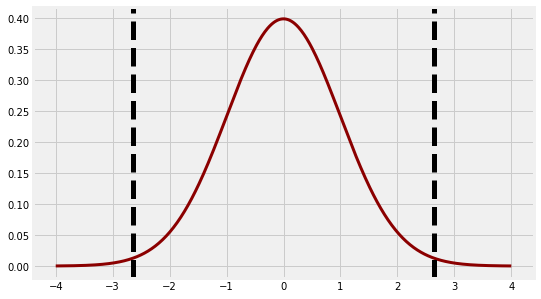

In [96]:
# let's visualize t-stat
xpts = np.linspace(-4, 4, 500)
ypts = stats.t.pdf(xpts, len(recent) + len(past) - 2, 0, 1)

fig = plt.figure(figsize=(8, 5)) # set figure size on fig
ax = fig.gca() # get the current axis from the figure initiated
ax.plot(xpts, ypts, linewidth=3, color='darkred')
ax.axvline(t_value, color='black', lw=5, linestyle='--')
ax.axvline(-t_value, color='black', lw=5, linestyle='--')
plt.show()

## Conclusion:
Our p-value 0.0088 is much smaller than the significance level of the test 0.05, therefore we reject the null hypothesis.
According to the t-test result, there is a significant difference between the means of the two samples. The number of Licenses issued every year after 2010 is significantly larger than the mean number of Licenses issued every year during the nineties. Further investigation and more data is needed to indicate the reasons behind this increase. It could be simply due to an increase in the population of the country. It could also be that more roads were constructed, especially in the smaller regions. Urbanization and an increase in people's need to travel longer distances to work would cause more people to depend on cars as their main means of transportation. 

## Outside Research

Based upon your observations, choose **three** regions that demonstrate interesting trends in the number of driving licenses and traffic accidents. Spend some time doing outside research on provincial and central policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Answer:

## Increase in Number of Driving Licenses in Riyadh

We can see in the following graph that the number of licenses in 2017 is almost double the value in 2016. After searching through the MOI website, this increase could be due to the new regulation that allows women in KSA to drive. 

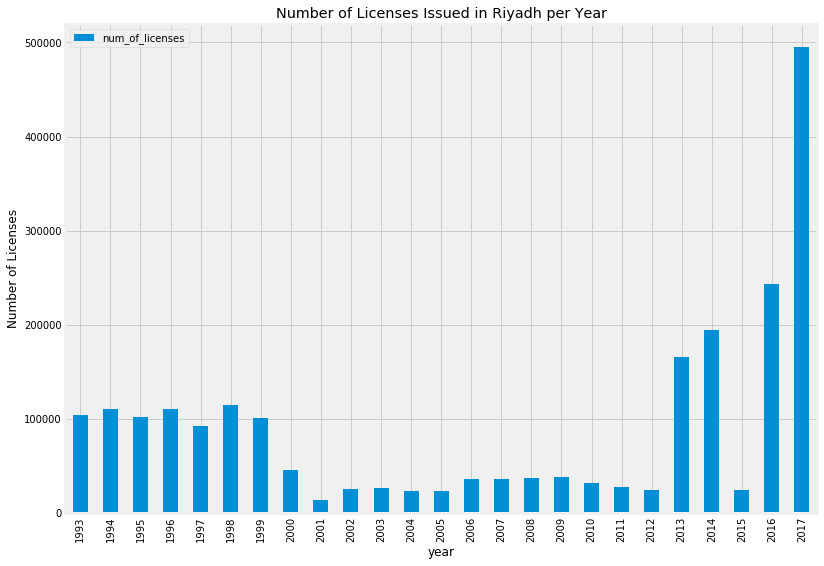

In [97]:
license.loc['Riyadh'].sort_index().plot.bar(figsize=(12,9))
plt.title('Number of Licenses Issued in Riyadh per Year')
plt.xlabel('year')
plt.ylabel('Number of Licenses')
plt.show();

## Decrease in the number of accidents in Riyadh

We can see in the following graph that the number of accidents in Riyadh dropped by almost 30% (calculated below). After searching through the MOI and MOT website, this decrease could be due to the increase in traffic violation fines and restrictions on using cell phones while driving. Also, the Ministry of Transportaion launched the campaign "Our Destination is Your Destination" which aims to decrease accidents. However, there is no noticable change in the number of injured and dead casualties by car accidents according to our data, although external resources indicate a decrease in the number of casualties (the reference is provided below).



#### references: 

https://mot.gov.sa/en-us/MediaCenter/News/Pages/news849.aspx
http://live.saudigazette.com.sa/article/164574/New-traffic-laws-in-15-days

In [98]:
#calculating the percentage of decrease in the number of traffic accidents in Riyadh
accidents_2016 = 141736
accidents_2017 = 99925
(accidents_2016-accidents_2017)/accidents_2016

0.29499209798498616

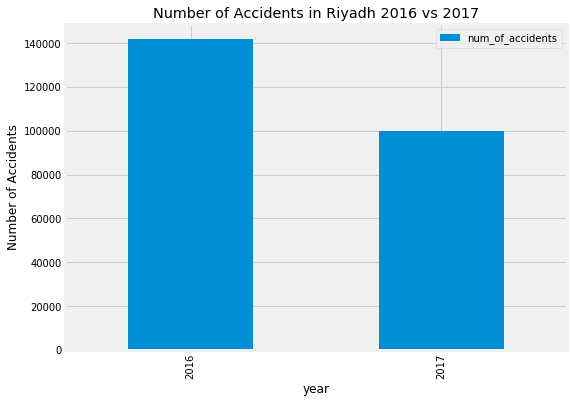

In [99]:
df.loc[('Riyadh',slice(None))][['num_of_accidents']].plot.bar(figsize=(8,6))
plt.title('Number of Accidents in Riyadh 2016 vs 2017')
plt.xlabel('year')
plt.ylabel('Number of Accidents')
plt.show();

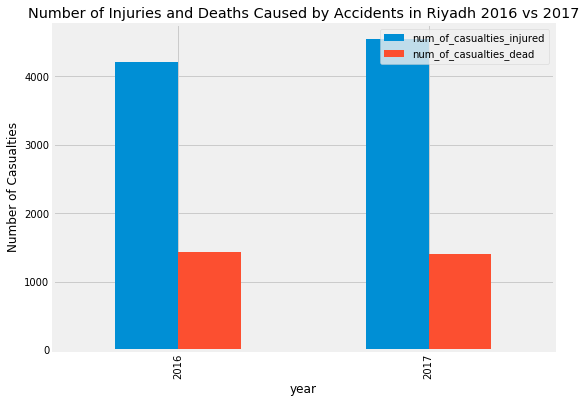

In [100]:
df.loc[('Riyadh',slice(None))][['num_of_casualties_injured','num_of_casualties_dead']].plot.bar(figsize=(8,6))
plt.title('Number of Injuries and Deaths Caused by Accidents in Riyadh 2016 vs 2017')
plt.xlabel('year')
plt.ylabel('Number of Casualties')
plt.show();

## Tabouk - Number of Licenses 2015

There is a sudden drop in the number of driving licenses in Tabouk, 2015. I did some research on it, but unfortunately failed to find an explanation. It could be simply a mistake in recording the data due to a typing error.

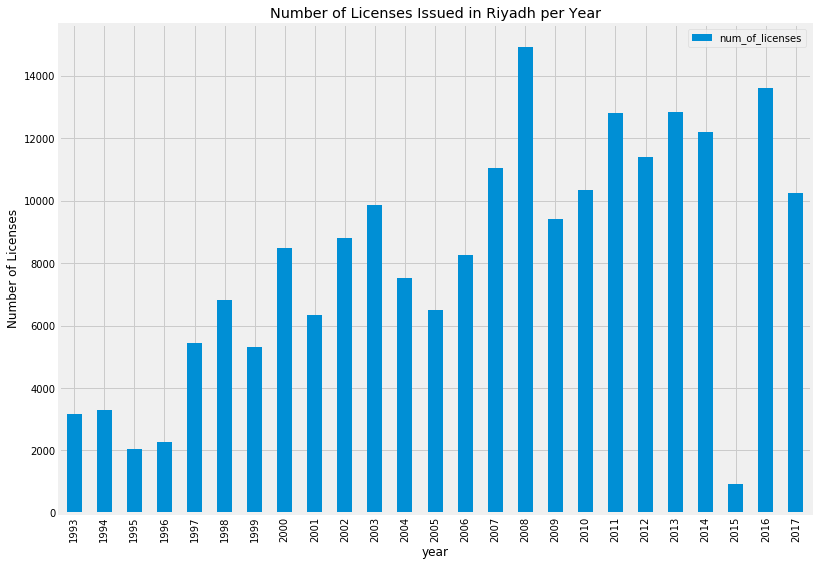

In [101]:
license.loc['Tabouk'].sort_index().plot.bar(figsize=(12,9))
plt.title('Number of Licenses Issued in Riyadh per Year')
plt.xlabel('year')
plt.ylabel('Number of Licenses')
plt.show();

## Increased Number of Casualties Injured by Car Accidents in Makkah

According to the plot below, Makkah has a very high number of injured casualties by accidents. It is the largest across all regions, more than Riyadh although the later has more licenses issued per year. After some research, it seems that many of the accidents in the Makkah region are due to Jeddah-Makkah road accidents.  
reference: http://www.arabnews.com/news/502251   

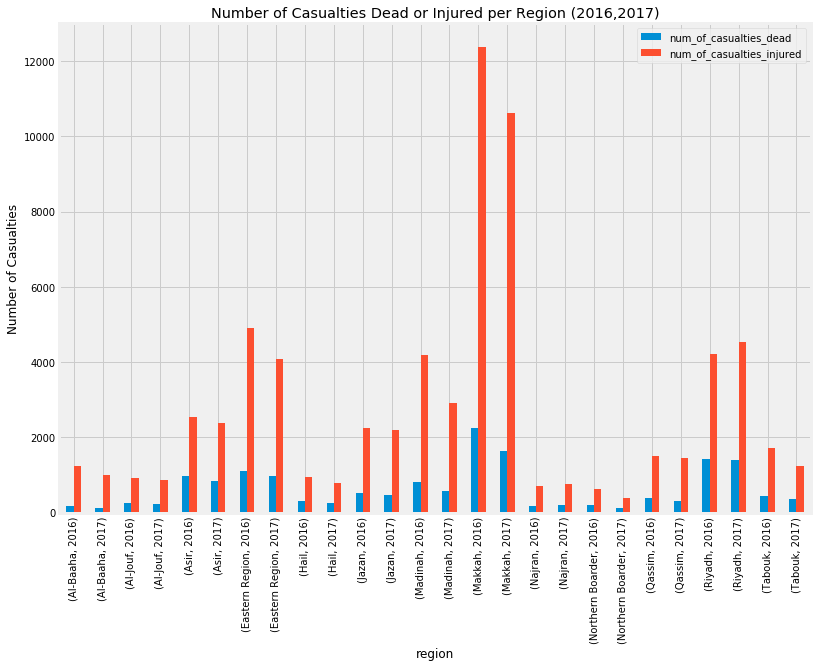

In [102]:
traffic[['num_of_casualties_dead','num_of_casualties_injured']].sort_index().plot.bar(figsize=(12,9))
plt.title('Number of Casualties Dead or Injured per Region (2016,2017)')
plt.xlabel('region')
plt.ylabel('Number of Casualties')
plt.show();

In [103]:
# Comparison between Riyadh and Makkah
df.loc[(['Riyadh','Makkah'],slice(None))]

num_of_accidents  num_of_casualties_dead  \
region year                                             
Makkah 2016            134838                    2243   
       2017            145541                    1641   
Riyadh 2016            141736                    1430   
       2017             99925                    1399   

             num_of_casualties_injured  num_of_licenses  
region year                                              
Makkah 2016                      12383           136055  
       2017                      10623           142487  
Riyadh 2016                       4207           242851  
       2017                       4540           495307

## Conclusions and Recommendations

Answer:

- Based on your exploration of the data, what are you key takeaways and recommendations?


1) Driving Licenses continue to increase across the years and regions. Therefore, the government needs to make an effort to ensure that this increase is not coupled with an increase in accidents and injuries and deaths. 

2) According to the data for 2016 and 2017, there is a significant decrease in the number of accidents in Riyadh (29%). This decrease, according to the MOT, is a result of government efforts such as launching the campaign "Our Destination is Your Destination", as well as stronger regulations against speeding and cell phone use while driving. This suggests that the efforts that took place were effective. Therefore, the government should continue to work in that direction. 

3) The Makkah region requires more attention to understand the reasons behind the increased number of car accident casualties. Makkah has the highest number of injuries and deaths caused by car accidents across all regions, although the number of licenses in Makkah is much less than that for Riyadh. According to this research, the Jeddah-Makkah road is a common source of accidents in the region. Further investigation may reveal the causes of the accidents. For example, if more accidents take place at night, it could be an indication that the road suffers from poor visibility at night.  

- Are there additional data you desire that would better inform your investigations? Yes.

1) More longitudinal data about traffic and accidents would have been much more insightful. I was interested in testing the effect of 'Saher' which was implemented in 2010, but unfortunately the data is not available here. 

2) Information about the causes of accidents, such as speeding or using the phone while driving.

3) Information about the time of the accident (day vs night, rush hour vs non-rush hour).

4) Information about the person who had the accident: 
- The age group of the driver would be insightful for designing new regulations and campaigns. For example if most accidents are caused by younger ages, then campaigns should target them. 
- The nationality of the driver: If more accidents are caused by non-Saudi nationalities, perhaps this will be resolved with the expulsion of some nationalities and illegal labor from the country, as well as female drivers who would eventualy replace their foreign drivers.
- The Gender of the driver: if more accidents are caused by females, this could be due to the infancy of the decision of permitting women to drive, and remedied by time alone.